In [1]:
# mnist:手寫數字資料
from tensorflow.keras.datasets.mnist import load_data

# 輸入: x 輸出: y 
# 訓練(帶回家的): train 測試(小考): test
# ((訓練圖片 訓練答案), (測試圖片 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import pandas as pd
print(y_train[0])
# pandas(pd):表格工具 pd.DataFrame: 把東西轉換成表格
pd.DataFrame(x_train[0])

5


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


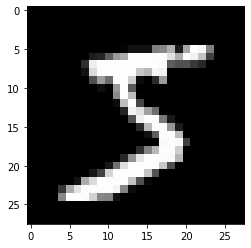

In [4]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap="gray")

In [5]:
# 創造我們模型: 完整模型model 一層一層layer
# Sequential: layer一定會堆在前一層的上面
from tensorflow.keras.models import Sequential
# Dense: 稠密層/全連接層
from tensorflow.keras.layers import Dense
layers = [
    # 128:128根神經, input_dim:784(28*28)
    Dense(128, activation="sigmoid", input_dim=784),
    Dense(10, activation="sigmoid")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 輸出一個: binary crossentropy
# 輸出多個: categorical crossentropy
model.compile(loss="mse",
       metrics=["accuracy"])

In [7]:
# 預處理
# x: 1.reshape 2.scaling
# y: one-hot
from tensorflow.keras.utils import to_categorical
x_train_r = x_train.reshape(-1, 784) / 255
x_test_r = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(x_train_r.shape)
print(y_train_cat[0])
print(y_train[0])

(60000, 784)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_r, 
     y_train_cat,
     validation_split=0.1,
     batch_size=200,
     epochs=270,
     verbose=2,
     callbacks=callbacks)

Epoch 1/270
270/270 - 4s - loss: 0.0415 - accuracy: 0.7924 - val_loss: 0.0170 - val_accuracy: 0.9247
Epoch 2/270
270/270 - 2s - loss: 0.0169 - accuracy: 0.9111 - val_loss: 0.0118 - val_accuracy: 0.9368
Epoch 3/270
270/270 - 1s - loss: 0.0132 - accuracy: 0.9263 - val_loss: 0.0098 - val_accuracy: 0.9468
Epoch 4/270
270/270 - 1s - loss: 0.0114 - accuracy: 0.9363 - val_loss: 0.0085 - val_accuracy: 0.9535
Epoch 5/270
270/270 - 1s - loss: 0.0101 - accuracy: 0.9428 - val_loss: 0.0079 - val_accuracy: 0.9570
Epoch 6/270
270/270 - 1s - loss: 0.0091 - accuracy: 0.9482 - val_loss: 0.0072 - val_accuracy: 0.9605
Epoch 7/270
270/270 - 1s - loss: 0.0084 - accuracy: 0.9529 - val_loss: 0.0066 - val_accuracy: 0.9652
Epoch 8/270
270/270 - 2s - loss: 0.0077 - accuracy: 0.9559 - val_loss: 0.0063 - val_accuracy: 0.9675
Epoch 9/270
270/270 - 1s - loss: 0.0072 - accuracy: 0.9595 - val_loss: 0.0059 - val_accuracy: 0.9678
Epoch 10/270
270/270 - 1s - loss: 0.0067 - accuracy: 0.9624 - val_loss: 0.0056 - val_accura

In [9]:
model.evaluate(x_test_r, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9789


[0.004012900870293379, 0.9789000153541565]

In [10]:
# sklearn: predict_proba/predict
# keras: predict/predict_classes
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_r)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(真實)".format(i) for i in range(10)],
       columns=["{}(預測)".format(i) for i in range(10)])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),970,0,2,1,0,1,4,1,1,0
1(真實),0,1125,3,0,0,1,3,1,2,0
2(真實),4,2,1009,1,1,1,3,7,4,0
3(真實),0,0,5,993,1,2,0,6,1,2
4(真實),1,0,2,1,965,0,4,1,2,6
5(真實),3,1,0,13,1,864,3,1,3,3
6(真實),7,2,0,1,1,4,938,1,4,0
7(真實),1,3,11,3,1,0,0,1001,1,7
8(真實),5,0,2,4,4,3,2,5,946,3
9(真實),4,2,0,10,7,3,0,4,1,978


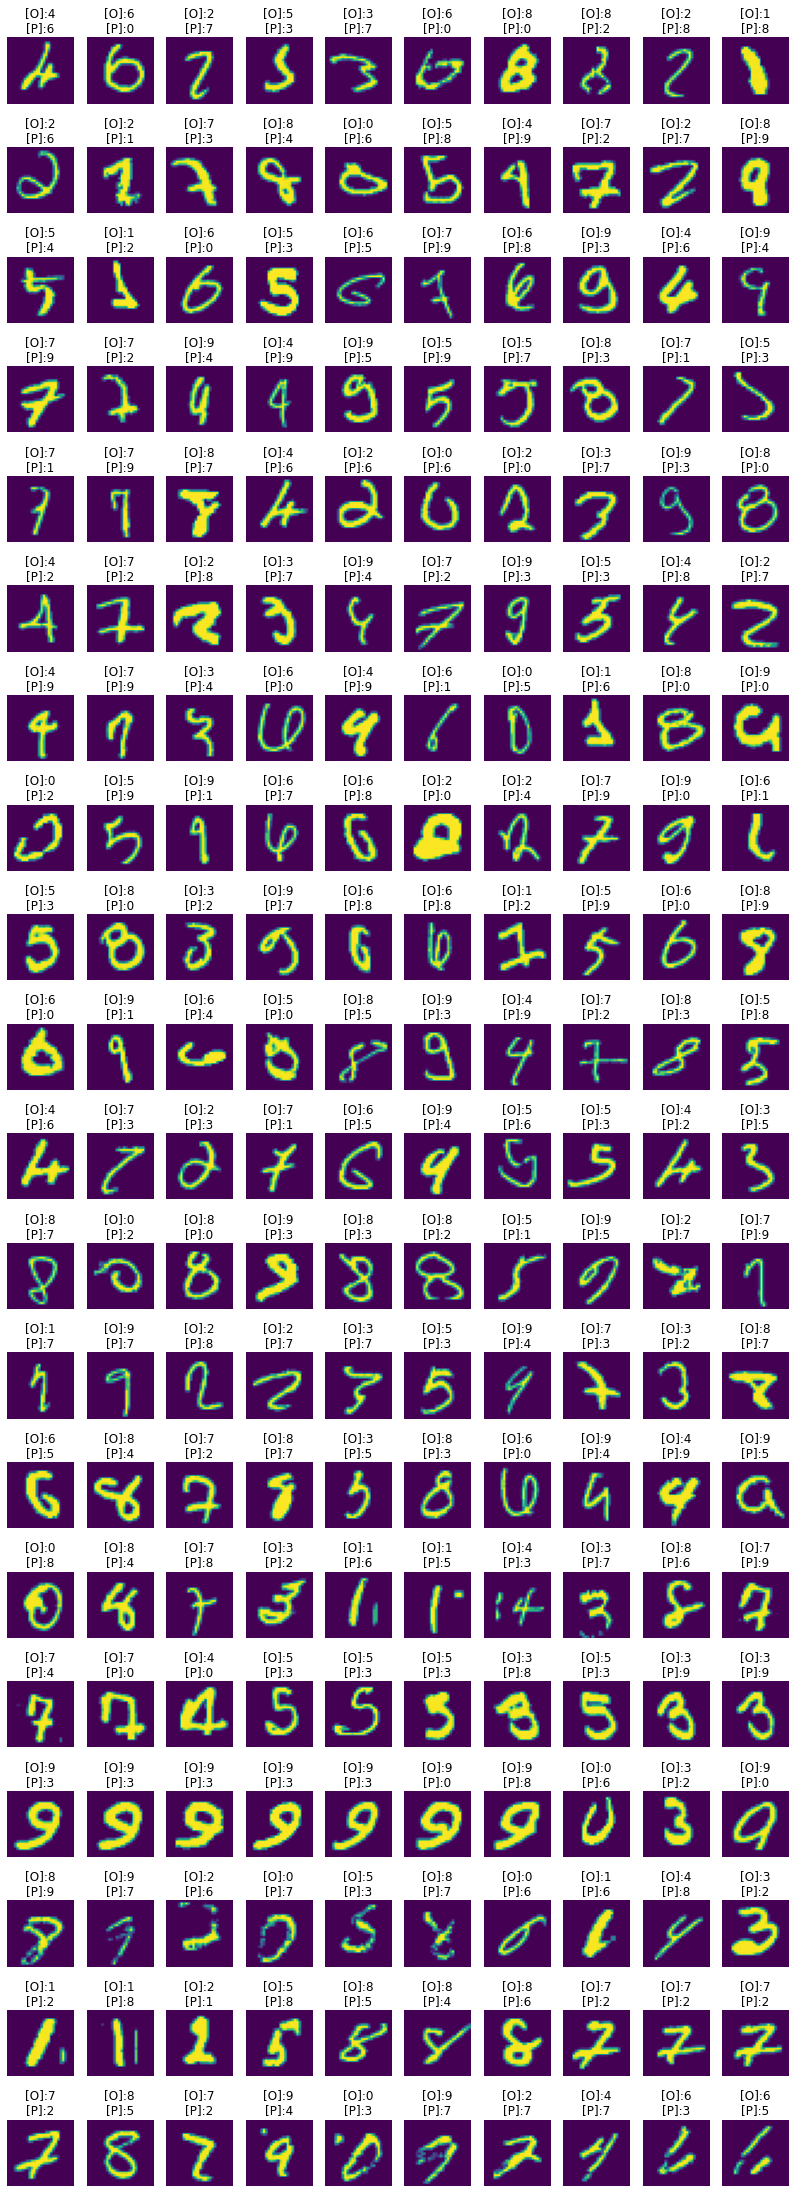

In [11]:
import numpy as np
idx = np.nonzero(pre != y_test)[0][:200]
false_pre = pre[idx]
false_ori = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(false_ori[i], false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
# PIL(pillow)
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
fn = input("檔名")
# img = Image.open(fn).resize((28, 28)).convert("L")
img = load_img(fn, target_size=(28, 28)).convert("L")
img = np.array(img)
img_r = img.reshape(1, 784) / 255
proba = model.predict(img_r)[0]
for i in range(10):
    print(i, "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", ans)
plt.imshow(img)